In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd
from IPython.display import Image

###Problem 1 Feedforward: Building a ReLu 2 Layer neural
network
####Part 1

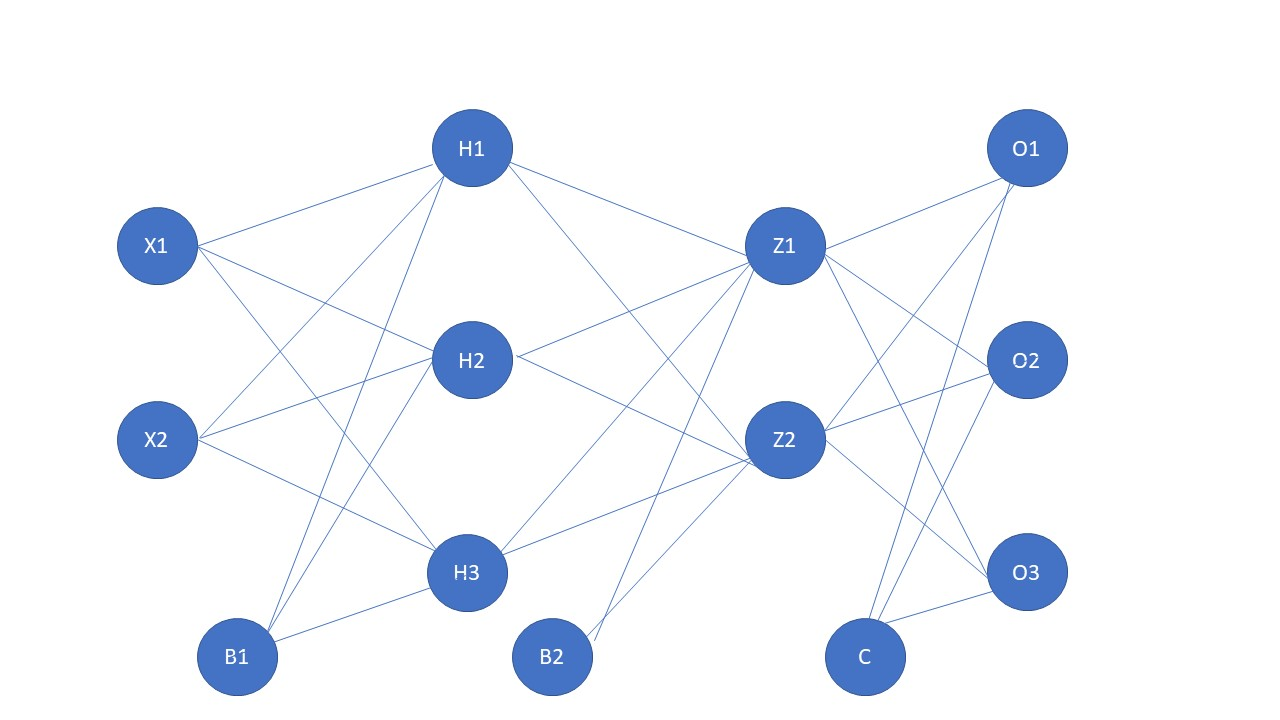

In [55]:
Image(filename='nn.jpg')


####Part 2
<br>$\hat{y} = softmax(\max(\max(XW_1+b_1,0)W_2+b_2,0)W_3+c)$, where $softmax(x_i) =  \frac{e^x_i}{\sum_{i = 1}^{n} e^x_i}$

####Part 3

In [56]:
def relu(x):
    return np.maximum(x,0)
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis = 1))[:,np.newaxis]
def ff_nn_2_ReLu(x,w_1,w_2,w_3,b_1,b_2,c):
    a = np.dot(w_1,x)+b_1
    h1 = relu(a)
    z = np.dot(w_2,h1)+b_2
    h2 = relu(z)
    y = softmax(np.dot(w_3,h2)+c)
    return y

####Part 4

In [57]:
w_1 = np.array([[1,0],[-1,0],[0,0.5]])
w_2 = np.array([[1,0,0],[-1,-1,0]])
w_3 = np.array([[1,1],[0,0],[-1,-1]])
b_1 = np.array([[0,0,1]]).T
b_2 = np.array([[1,-1]]).T
c = np.array([[1,0,0]]).T
x = np.array([[1,0,0],[-1,-1,1]])
ff_nn_2_ReLu(x,w_1,w_2,w_3,b_1,b_2,c)

array([[ 0.57611688,  0.21194156,  0.21194156],
       [ 0.33333333,  0.33333333,  0.33333333],
       [ 0.1553624 ,  0.4223188 ,  0.4223188 ]])

###Problem 2 Gradient Descent
####Part 1
<br>$\frac{df(x+y)}{dx} = 2*(1-x)*(-1) + 200*(y-x^2)*(-2x) = 400x^3-400xy+2x-2$
<br>$\frac{df(x+y)}{dy} = 0+200*(y-x^2)*(1) = 200y-200x^2$

####Part 2

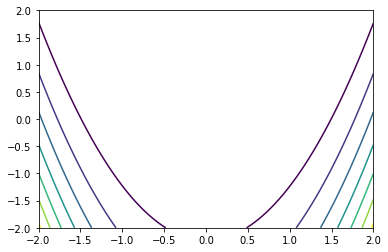

In [58]:

X, Y = np.meshgrid(np.linspace(-2, 2, 250), np.linspace(-2, 2, 500))
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [59]:
####Part 3

C:\Users\Danielle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Danielle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


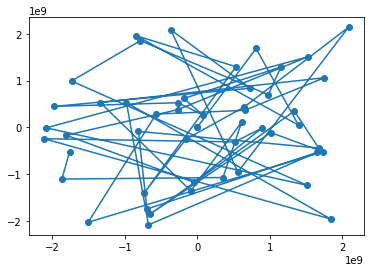

In [60]:
def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y+2*x-2 
    df_dy = 200*y-200*x**2
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=np.array([-2,-1]), iterations=10, learning_rate=12):
    point = starting_point

    trajectory = [point]
        
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

traj = grad_descent(iterations=50,learning_rate = 5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

C:\Users\Danielle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Danielle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


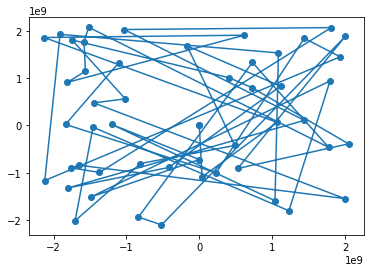

In [61]:
traj = grad_descent(iterations=50,learning_rate = 1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

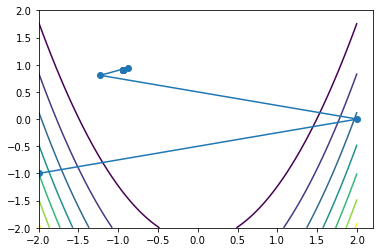

In [62]:
traj = grad_descent(iterations=10,learning_rate = 0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

####Part 4

In [63]:
def grad_descent_with_momentum(starting_point=np.array([-0.4,-1]), iterations=10, alpha=.9, epsilon=0.01):

    point = starting_point

    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

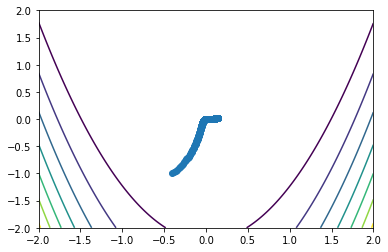

In [64]:
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.0001, alpha=0.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

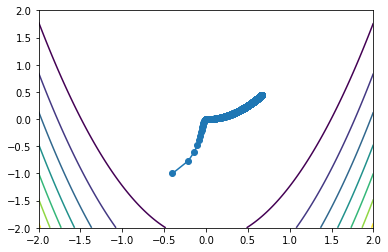

In [65]:
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.001, alpha=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

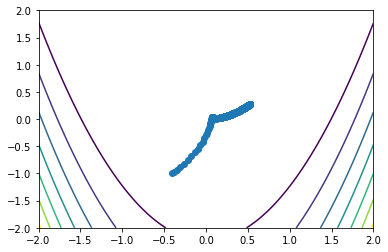

In [66]:
traj = grad_descent_with_momentum(iterations=1000, epsilon=0.0001, alpha=0.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

###Problem 3
####Part 1
<br>From problem 1, then the model parameters (weight matrics and bias) are $W^1,W^2,W^3,b^1,b^2$ and  $b^3$. By nelson's equations of backpropagation, $\delta^L = \nabla_{a}L \odot \sigma^{'} (z^L)$, $\delta^l = ((w^{l+1})^T\delta^{l+1} \odot\sigma^{'}(z^l)$, $\frac{\partial L}{\partial b^l_j} = \delta^l_j$, $\frac{\partial L}{\partial w^l_{jk}} = a^{l-1}_k\delta^l_j$.

And we already got $\delta^ L$ = $\frac{\partial L}{z^L} = \hat y - y$.

Therefore, $$
\frac{\partial L}{\partial W^3} = a^2\delta^L = a^2 (\hat y - y)  
$$

$$
\frac{\partial L}{\partial b^3} = \delta^L = \hat y - y 
$$$$
\frac{\partial L}{\partial W^2} = a^1 \delta^2 = a^1 ((W^3)^T \delta^L)\odot \sigma^{'} (z^2) = a^1((W^3)^T (\hat y-y) \odot \text{relu}^{'} (z^2)
$$$$
\frac{\partial L}{\partial b^2} = \delta^2 = ((W^3)^T \delta^L)\odot \sigma^{'} (z^2) = ((W^3)^T (\hat y-y) \odot \text{relu}^{'} (z^2)
$$$$
\frac{\partial L}{\partial W^1} = x \delta^1 = x((W^2)^T \delta^2)\odot \sigma^{'} (z^1) = x ((W^2)^T \delta^2) \odot \text{relu}^{'} (z^1)
$$$$
\frac{\partial L}{\partial b^1} = \delta^1 = ((W^2)^T \delta^2) \odot \text{relu}^{'} (z^1)
$$

In [67]:
def loss(y, y_hat):
 
    tot = y * np.log(y_hat)
    return  -tot.sum()

def relu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def forward(x,parameters):
    
    w_1,w_2,w_3,b_1,b_2,b_3 = parameters
    
    z_1 = x.dot(w_1.T) + b_1.T
    a_1 = relu(z_1)
    z_2 = a_1.dot(w_2.T) + b_2.T
    a_2 = relu(z_2)
    z_3 = a_2.dot(w_3.T) + b_3.T
    y_hat = softmax(z_3)
    
    return y_hat,z_1,a_1,z_2,a_2,z_3
def grad_f(x,y,parameters):
    
    w_1,w_2,w_3,b_1,b_2,b_3 = parameters
    
    y_hat,z_1,a_1,z_2,a_2,z_3 = forward(x,parameters)
    
    dw3 = np.zeros((3,2))
    db3 = np.zeros((3,1))
    dw2 = np.zeros((2,3))
    db2 = np.zeros((2,1))
    dw1 = np.zeros((3,2))
    db1 = np.zeros((3,1))
    
    for i in range(x.shape[0]):
        dL = y_hat[i].reshape(3,1) - y[i].reshape(3,1)
    
        db3+= dL

        dw3+= dL.dot(a_2[i].reshape(1,2))
        
        delta2 = w_3.T.dot(dL)*relu_derivative(z_2[i].reshape(2,1))
        
        db2+= delta2
        
        dw2+= delta2.dot(a_1[i].reshape(1,3))
        
        delta1 = w_2.T.dot(delta2)*relu_derivative(z_1[i].reshape(3,1))
        
        db1+= delta1
        
        dw1+= delta1.dot(x[i].reshape(1,2))
        
    
    return dw1, dw2, dw3,db1,db2,db3

####Part 3

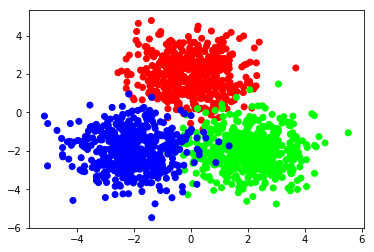

In [71]:
covm = [[1,0],[0,1]]
x_1 = np.random.multivariate_normal(mean = [0,2],cov = covm,size = 500)
x_2 = np.random.multivariate_normal(mean = [2,-2],cov = covm,size = 500)
x_3 = np.random.multivariate_normal(mean = [-2,-2],cov = covm,size = 500)
x = np.concatenate((x_1,x_2,x_3))
y_1 = np.array([[1,0,0] for i in range(500)])
y_2 = np.array([[0,1,0] for i in range(500)])
y_3 = np.array([[0,0,1] for i in range(500)])
y = np.concatenate((y_1,y_2,y_3))
plt.scatter(x[:,0], x[:,1],c=y)

####Part 4


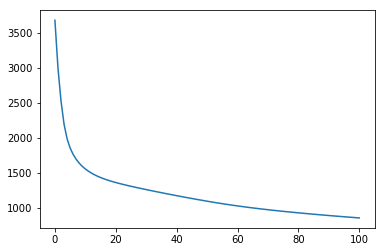

In [69]:
def grad_descent(x, y, parameters, iterations=50, learning_rate=10):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(x,point)[0])]
    
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        point= np.subtract(point,[j*learning_rate for j in grad])
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory), losses)

parameters = [w_1,w_2,w_3,b_1,b_2,c]
traj, losses = grad_descent(x ,y,parameters, iterations=100,learning_rate=0.00005)
plt.plot(losses)


####Part 5

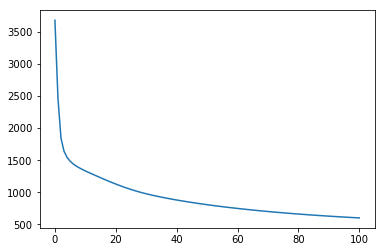

In [72]:
def grad_descent_with_momentum(x,y,parameters, iterations=50, alpha=.9, epsilon=1):
    point = parameters
    trajectory = [point]
    losses = [loss(y, forward(x,point)[0])]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        y_hat = forward(x,point)[0]
        grad = grad_f(x, y,point)
        v = np.add([alpha*i for i in v],[j*epsilon for j in grad])
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, forward(x,point)[0]))
    return (np.array(trajectory),losses)

#parameters = [w_1,w_2,w_3,b_1,b_2,b_3]
traj, losses = grad_descent_with_momentum(x ,y,parameters, iterations=100,alpha=.2, epsilon=0.0001)
plt.plot(losses)

In [ ]:
During the graph above, gradient descent with momentum is more efficient than regular fradient descent